In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

In [67]:
with open("data/winequality.csv", "r") as f:
    df = pd.read_csv(f)
    df = df.sort_values(by = "quality").reset_index(drop = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
2,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
3,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
4,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


In [68]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

missing_values = df.isnull().sum()

X = df.drop('quality', axis=1)
y = pd.Categorical(df['quality'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape


(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 (1279, 11),
 (320, 11))

multiclass classfication for loistic regression ,LDA and QRA

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Train LDA
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test, y_pred_lda)

# Train QDA
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
acc_qda = accuracy_score(y_test, y_pred_qda)

acc_log_reg, acc_lda, acc_qda


/Users/rpi11/anaconda3/envs/dsan5200/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(0.603125, 0.609375, 0.571875)

In [71]:
lda.classes_
lda.priors_
lda.scalings_


array([[ 0.32658134, -1.01313159, -0.26852096, -1.90678729, -0.66022376],
       [-0.38812772, -0.88868604, -0.39060637,  0.53771732, -0.18796088],
       [-0.07636183, -0.39406198, -0.37531558,  0.36149844, -0.20004664],
       [ 0.13376467, -0.48472023, -0.40707216, -0.79584579,  0.3502464 ],
       [-0.22957436, -0.22395813,  0.23437014, -0.05919505, -0.31690623],
       [ 0.14234874, -0.02273617,  0.66824634,  0.39020595, -0.13864419],
       [-0.33316855,  0.51352679, -0.94755882, -0.23856339, -0.25799234],
       [-0.26305751,  1.07864899,  0.84753189,  1.48098983, -0.48454727],
       [-0.05786622, -0.77101868,  0.15534935, -1.21348407, -0.2261624 ],
       [ 0.41937994, -0.12251491, -0.18696642, -0.28781962,  0.10693184],
       [ 0.71570774,  0.32963217,  0.12698561,  1.29210198, -0.35295775]])

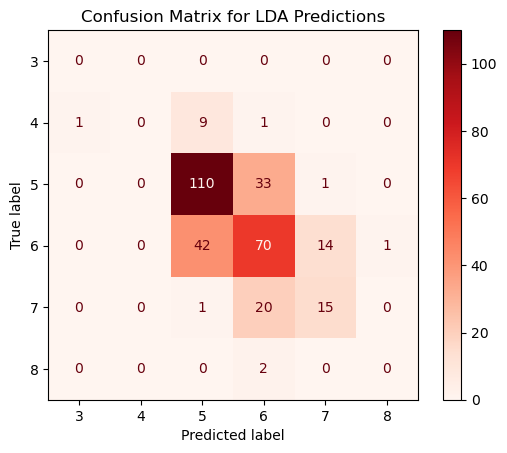

In [73]:

y_pred_lda = lda.predict(X_test)

conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

ConfusionMatrixDisplay(conf_matrix_lda, display_labels=sorted(set(list(y_pred_lda)+list(y_test)))).plot(values_format='d', cmap='Reds')
plt.title('Confusion Matrix for LDA Predictions')
plt.show()


In [57]:
qda.means_

array([[ 2.31896153e-02,  1.99258160e+00, -5.13379376e-01,
         6.82478724e-02,  7.44591384e-01, -4.66192517e-01,
        -6.55854290e-01,  3.80189861e-01,  5.62963769e-01,
        -5.20193445e-01, -4.39282875e-01],
       [-2.67085052e-01,  8.22879814e-01, -3.80357226e-01,
         1.51527068e-01,  1.37342185e-01, -2.99977135e-01,
        -2.75597396e-01, -1.48410464e-01,  3.72287870e-01,
        -2.71495478e-01, -1.42260080e-01],
       [-8.91701376e-02,  3.14750461e-01, -1.52749957e-01,
        -1.50424561e-03,  9.67882294e-02,  7.66055838e-02,
         2.76642068e-01,  1.80869180e-01, -2.35013928e-02,
        -1.95566575e-01, -4.65389158e-01],
       [ 4.42594794e-02, -1.67116353e-01,  3.60906665e-02,
        -5.31478280e-02, -6.66477936e-02, -2.63593825e-03,
        -1.85788786e-01, -3.74567816e-02,  3.83070768e-02,
         9.01472816e-02,  1.70355210e-01],
       [ 3.43657763e-01, -7.19378594e-01,  5.35272668e-01,
         1.31121545e-01, -2.80085757e-01, -1.24151182e-01,
  

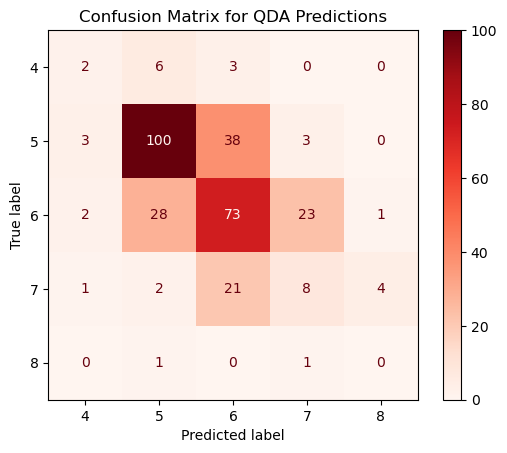

In [74]:
y_pred_qda = qda.predict(X_test)

conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)

conf_matrix_qda

ConfusionMatrixDisplay(conf_matrix_qda, display_labels=sorted(set(list(y_pred_qda)+list(y_test)))).plot(values_format='d', cmap='Reds')
plt.title('Confusion Matrix for QDA Predictions')
plt.show()

In [65]:
set(y_test)

{4, 5, 6, 7, 8}

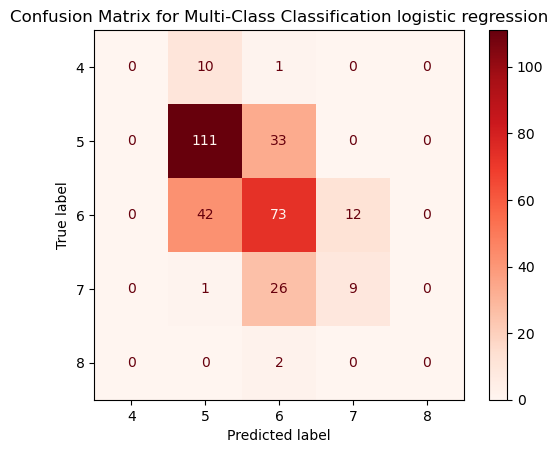

In [75]:
from sklearn.metrics import mean_squared_error

import numpy as np


rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_log_reg))
rmse_sklearn
comparison_df = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_pred_log_reg}).head(10)
comparison_df

conf_matrix_multiclass = confusion_matrix(y_test, y_pred_log_reg)

# Plotting the confusion matrix without specifying binary labels
ConfusionMatrixDisplay(conf_matrix_multiclass, display_labels=sorted(set(list(y_pred_log_reg)+list(y_test)))).plot(values_format='d', cmap='Reds')
plt.title('Confusion Matrix for Multi-Class Classification logistic regression')
plt.show()

binary classification used 

In this parts , we use binning the quality as different value to transfer the problem as a binary classification problem. We tried different target variable number as an binary outcome. And the result is as follow

In [11]:
import statsmodels.api as sm

# Convert the target variable into a binary outcome
y_binary = (y_train > 5).astype(int)

X_train_const = sm.add_constant(X_train)

glm_binom = sm.GLM(y_binary, X_train_const, family=sm.families.Binomial())
glm_result = glm_binom.fit()

glm_summary = glm_result.summary()
glm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1279
Model:                            GLM   Df Residuals:                     1267
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -669.58
Date:                Tue, 16 Apr 2024   Deviance:                       1339.2
Time:                        11:37:51   Pearson chi2:                 1.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2832
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2344      0.069      3.401      0.001       0.099       0.369
x1             0.2425      0.188      1.288      0.198      -0.127       0.612
x2            -0.5834      0.095     -6.119      0.000      -0.770      -0.397
x3            -0.2279      0.120     -1.904      0.057      -0.462       0.007
x4             0.0395      0.084      0.471      0.638      -0.125       0.204
x5            -0.1987      0.086     -2.316      0.021      -0.367      -0.031
x6             0.3095      0.096      3.214      0.001       0.121       0.498
x7            -0.5702      0.107     -5.350      0.000      -0.779      -0.361
x8            -0.0438      0.168     -0.261      0.794      -0.372       0.285
x9            -0.0827      0.122     -0.680      0.496      -0.321       0.156
x10            0.4194      0.085      4.952      0.000       0.253       0.585
x11            0.8996      0.122      7.352      0.000       0.660       1.139
==============================================================================
"""

In [12]:
y_test_binary = (y_test > 5).astype(int)
X_test_const = sm.add_constant(X_test)
y_test_pred_prob = glm_result.predict(X_test_const)
y_test_pred_binary = (y_test_pred_prob > 0.5).astype(int)
binary_model_accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
binary_model_accuracy

0.759375

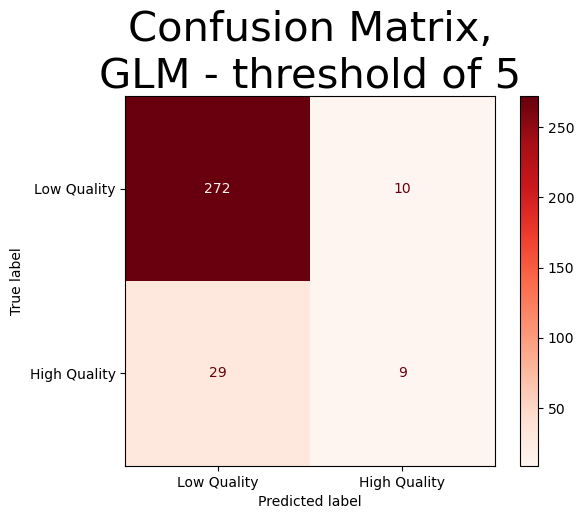

In [91]:
conf_matrix_sm = confusion_matrix(y_test_binary, y_test_pred_binary)

ConfusionMatrixDisplay(conf_matrix_sm, display_labels=['Low Quality', 'High Quality']).plot(values_format='d', cmap='Reds')
plt.title('Confusion Matrix,\nGLM - threshold of 5', fontsize = 30)
plt.show()

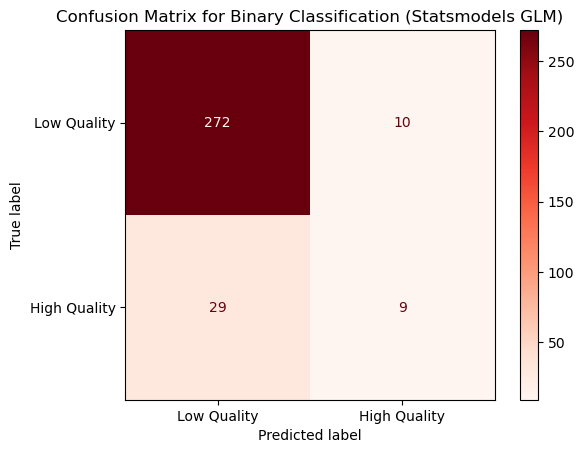

In [14]:
import statsmodels.api as sm

# Convert the target variable into a binary outcome
y_binary = (y_train > 6).astype(int)

X_train_const = sm.add_constant(X_train)

glm_binom = sm.GLM(y_binary, X_train_const, family=sm.families.Binomial())
glm_result = glm_binom.fit()

glm_summary = glm_result.summary()
glm_summary

y_test_binary = (y_test > 6).astype(int)
X_test_const = sm.add_constant(X_test)
y_test_pred_prob = glm_result.predict(X_test_const)
y_test_pred_binary = (y_test_pred_prob > 0.5).astype(int)
binary_model_accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
binary_model_accuracy

conf_matrix_sm = confusion_matrix(y_test_binary, y_test_pred_binary)

ConfusionMatrixDisplay(conf_matrix_sm, display_labels=['Low Quality', 'High Quality']).plot(values_format='d', cmap='Reds')
plt.title('Confusion Matrix for Binary Classification (Statsmodels GLM)')
plt.show()

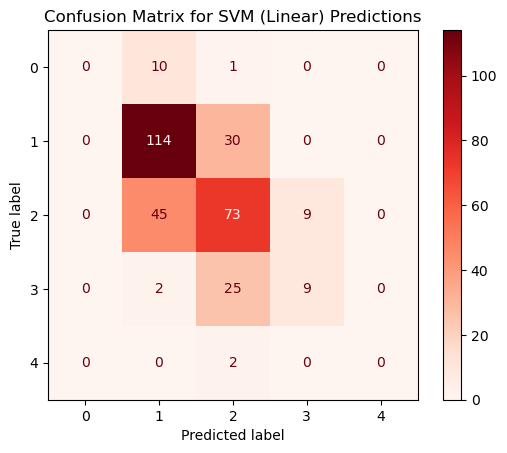

In [16]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)

svm_linear.fit(X_train, y_train)

y_pred_svm_linear = svm_linear.predict(X_test)

accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
conf_matrix_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

accuracy_svm_linear, conf_matrix_svm_linear

# Plotting the confusion matrix for SVM predictions
ConfusionMatrixDisplay(conf_matrix_svm_linear).plot(values_format='d', cmap = "Reds")
plt.title('Confusion Matrix for SVM (Linear) Predictions')
plt.show()


In [18]:
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
accuracy_svm_linear

0.6125

/Users/rpi11/anaconda3/envs/dsan5200/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


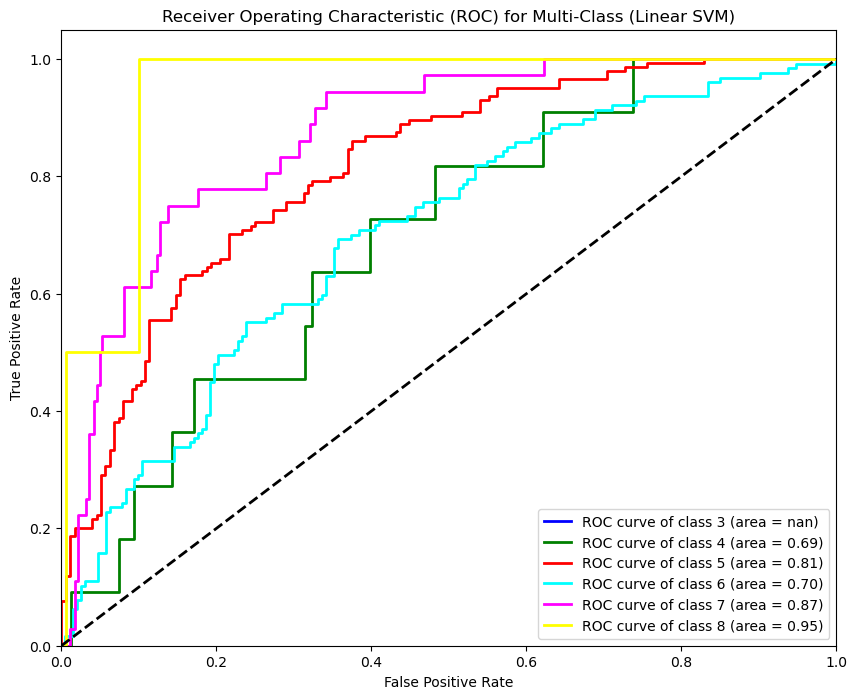

In [23]:
svm_linear_ovr = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

svm_linear_ovr.fit(X_train, y_train)

y_prob_svm_linear = svm_linear_ovr.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_binarized.shape[1]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']

fpr_linear = dict()
tpr_linear = dict()
roc_auc_linear = dict()
for i in range(n_classes):
    fpr_linear[i], tpr_linear[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm_linear[:, i])
    roc_auc_linear[i] = auc(fpr_linear[i], tpr_linear[i])

# Plot all ROC curves for the linear SVM
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_linear[i], tpr_linear[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+3, roc_auc_linear[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class (Linear SVM)')
plt.legend(loc="lower right")
plt.show()


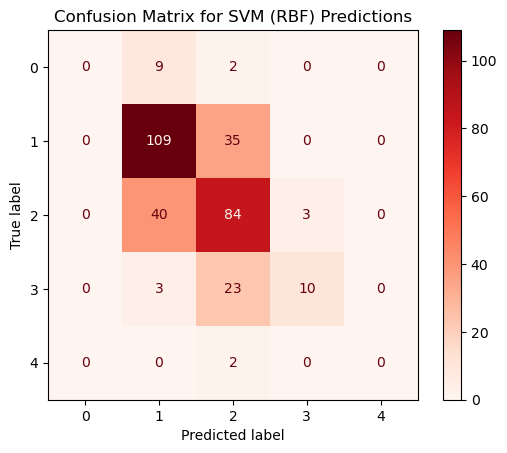

In [25]:
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test)

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

accuracy_svm_rbf, conf_matrix_svm_rbf

ConfusionMatrixDisplay(conf_matrix_svm_rbf).plot(values_format='d', cmap = "Reds")
plt.title('Confusion Matrix for SVM (RBF) Predictions')
plt.show()


In [26]:
accuracy_svm_rbf

0.634375

/Users/rpi11/anaconda3/envs/dsan5200/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


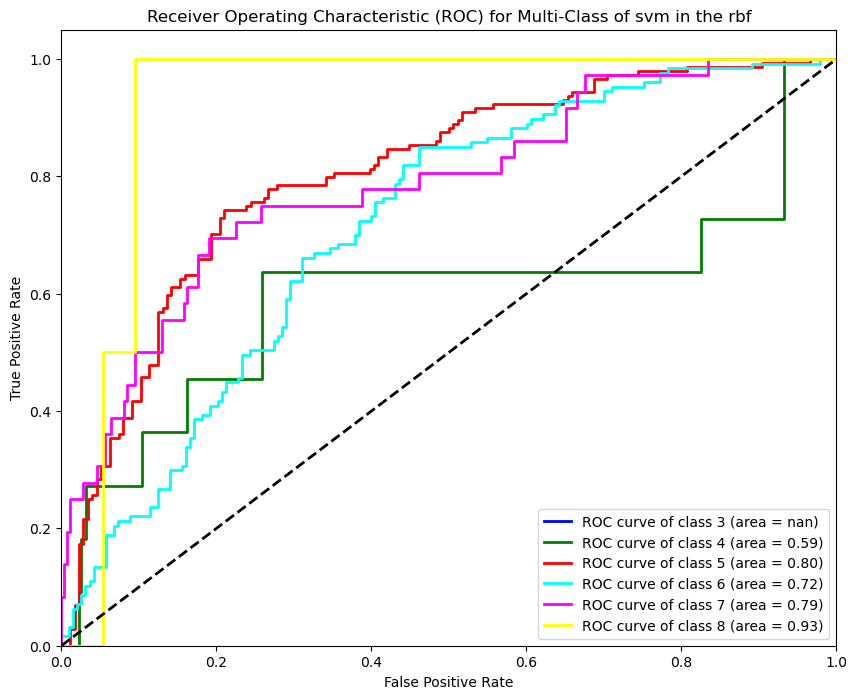

In [27]:
svm_rbf_ovr = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
svm_rbf_ovr.fit(X_train, y_train)
y_prob_svm_rbf = svm_rbf_ovr.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+3, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class of svm in the rbf')
plt.legend(loc="lower right")
plt.show()


ANN method. 

/Applications/anaconda3/envs/dsan5400/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,846 (77.52 KB)

 Trainable params: 19,334 (75.52 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/500
32/32 - 1s - 40ms/step - accuracy: 0.2424 - loss: 2.2938 - val_accuracy: 0.3867 - val_loss: 1.5761 - learning_rate: 0.0010
Epoch 2/500
32/32 - 0s - 2ms/step - accuracy: 0.4066 - loss: 1.7441 - val_accuracy: 0.5625 - val_loss: 1.3261 - learning_rate: 0.0010
Epoch 3/500
32/32 - 0s - 2ms/step - accuracy: 0.4350 - loss: 1.5879 - val_accuracy: 0.5703 - val_loss: 1.1905 - learning_rate: 0.0010
Epoch 4/500
32/32 - 0s - 3ms/step - accuracy: 0.4936 - loss: 1.4179 - val_accuracy: 0.6406 - val_loss: 1.0717 - learning_rate: 0.0010
Epoch 5/500
32/32 - 0s - 4ms/step - accuracy: 0.5337 - loss: 1.3307 - val_accuracy: 0.6211 - val_loss: 1.0150 - learning_rate: 0.0010
Epoch 6/500
32/32 - 0s - 2ms/step - accuracy: 0.5298 - loss: 1.2990 - val_accuracy: 0.6406 - val_loss: 0.9759 - learning_rate: 0.0010
Epoch 7/500
32/32 - 0s - 2ms/step - accuracy: 0.5386 - loss: 1.2236 - val_accuracy: 0.6445 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 8/500
32/32 - 0s - 2ms/step - accuracy: 0.5513 - loss: 

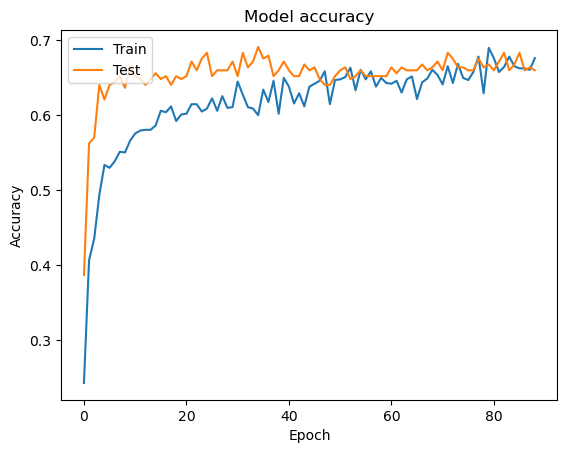

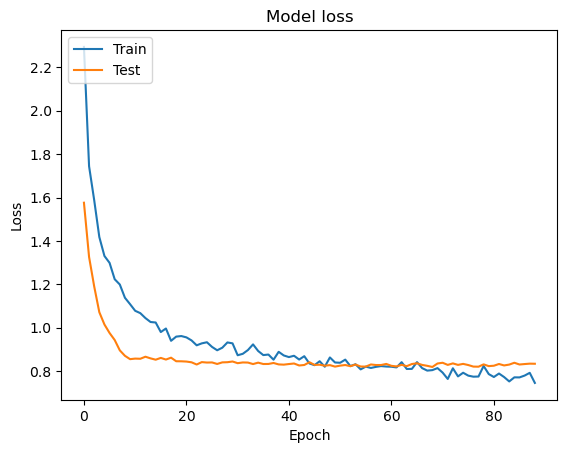

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


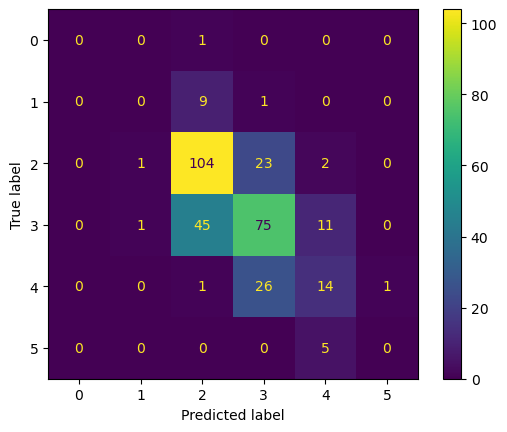

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.initializers import HeNormal

# Assuming y_train and y_test are your target variables for training and test sets

# Convert target variables to categorical (one-hot encoding)
y_train_encoded = to_categorical(y_train - 3)  # Adjust based on your target variable's minimum value
y_test_encoded = to_categorical(y_test - 3)

# Initialize the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train_normalized, y_train_encoded, epochs=500, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping, reduce_lr])
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
test_accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test - 3, y_pred_classes)  # Adjust based on your target variable's minimum value
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()



In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Fit on the training data and transform both training and test data
X_normalized = scaler.fit_transform(X)


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the target variable to one-hot encoding
y_encoded = to_categorical(y - 3)  # Adjust if y does not start at 3

# Set up k-fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Prepare to collect scores
fold_no = 1
scores = []

for train_index, test_index in kf.split(X_normalized):
    # Split the data into training and test sets for the current fold
    X_train_fold, X_test_fold = X_normalized[train_index], X_normalized[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]
    
    # Define the model architecture inside the loop
    model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],), kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    BatchNormalization(),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer
])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
    
    # Evaluate the model
    score = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    
    # Store the score
    scores.append(score)
    
    # Print results for the current fold
    print(f'Fold {fold_no} - Loss: {score[0]} - Accuracy: {score[1]}')
    
    fold_no += 1

# Calculate the average performance across all folds
average_score = np.mean(scores, axis=0)
print(f'Average scores for all folds: Loss: {average_score[0]} - Accuracy: {average_score[1]}')


ModuleNotFoundError: No module named 'tensorflow'